https://hub.binder-beta.omgwtf.in/user/91f90d7f-d8ee-4130-b853-65575517237c/notebooks/01-g-h-filter.ipynb

𝚗𝚎𝚠⎯𝚎𝚜𝚝𝚒𝚖𝚊𝚝𝚎=𝚙𝚛𝚎𝚍𝚒𝚌𝚝𝚒𝚘𝚗+410(𝚖𝚎𝚊𝚜𝚞𝚛𝚎𝚖𝚎𝚗𝚝−𝚙𝚛𝚎𝚍𝚒𝚌𝚝𝚒𝚘𝚗)
new_estimate=prediction+410(measurement−prediction)
 
$y^{hat}_{t+1} = y^{hat}_t + \frac{4}{10} (y_t - y^{hat}_t)$

### g-h filter
* g is the scaling we used for the measurement (weight in our example)
* h is the scaling for the change in measurement over time (lbs/day in our example).

## Filter

### Initialization
1. Initialize the state of the filter
2. Initialize our belief in the state

### Predict
1. Use system behavior to predict state at the next time step
2. Adjust belief to account for the uncertainty in prediction

### Update
1. Get a measurement and associated belief about its accuracy
2. Compute residual between estimated state and measurement
3. New estimate is somewhere on the residual line


### Terminology
* $z$ is the measurement, $x$ is the state
* $x$ is a vector e.g. x1 is the weight, x2 is the weight gain rate

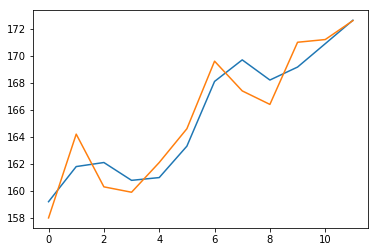

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        #prediction step
        x_pred = x_est + (dx*dt) # prediction = new state + gain
        dx = dx

        # update step
        residual = z - x_pred
        # new gain = old gain + h * d(error)/dt
        dx = dx    + h * (residual) / dt # h is gain, residual / time is the derivative
        # new state = old state + g * error
        x_est  = x_pred + g * residual # g is state
        results.append(x_est)  
    return np.array(results)

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
# plot_g_h_results(weights, data)
plt.plot(data)
plt.plot(weights)

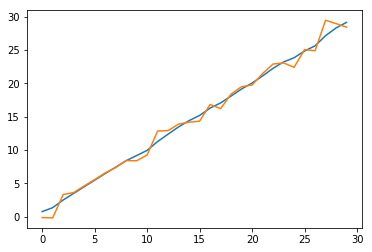

In [14]:
from numpy.random import randn
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + randn()*noise_factor for i in range(count)]

measurements = gen_data(0, 1, 30, 1)
data = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.2, h=0.02)

plt.plot(data)
plt.plot(measurements)

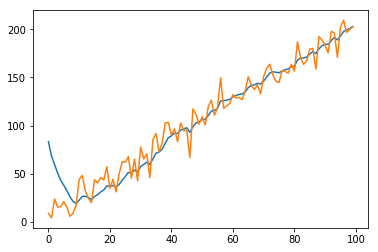

In [16]:
## bad initial guess
zs = gen_data(x0=5., dx=2., count=100, noise_factor=10)
data = g_h_filter(data=zs, x0=100., dx=2., dt=1., g=0.2, h=0.01)

plt.plot(data)
plt.plot(zs)